In [20]:
import tensorflow.keras as keras

In [2]:
import tensorflow as tf

print(tf.__version__)

1.14.0


In [3]:
# Pick the data of mnist
mnist = tf.keras.datasets.mnist

# Split the data in x's and y's train and test
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
# Print the data[0]
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
import matplotlib.pyplot as plt

# Print black and white image 
plt.imshow(x_train[0],cmap=plt.cm.binary)

# Print colored image 
#plt.imshow(x_train[0])
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
print(y_train[0])

5


In [7]:
# Normalize the data to a number between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

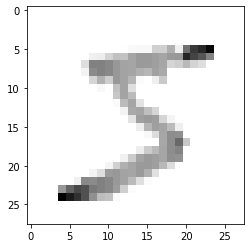

In [8]:
# Print the normalized data
#print(x_train[0])

# Print the normalized image 
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [9]:
# Create the Squential model
model = tf.keras.models.Sequential()

In [10]:
# Create the Models
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
# Compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2608 - acc: 0.9237
Epoch 2/3
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1080 - acc: 0.9665
Epoch 3/3
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0740 - acc: 0.9767


In [13]:
# Generate the evaluate
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.0955 - acc: 0.9692
0.09546062837168574
0.9692


In [14]:
# Save the model
model.save('epic_num_reader.model')

In [15]:
# Load the model
new_model = tf.keras.models.load_model('epic_num_reader.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
predictions = new_model.predict(x_test)

In [17]:
print(predictions)

[[3.63896788e-08 1.22949295e-08 1.98068992e-05 ... 9.99176323e-01
  2.66385342e-07 2.71417150e-07]
 [9.52639034e-09 1.22892234e-04 9.99860883e-01 ... 1.20463625e-07
  9.97904499e-06 1.15529973e-11]
 [7.21769311e-06 9.93634343e-01 7.33712950e-05 ... 1.10294565e-03
  3.54329403e-03 1.14868089e-06]
 ...
 [6.86241037e-08 1.11814479e-07 3.06930970e-09 ... 2.41751468e-06
  5.58870670e-06 2.02423063e-04]
 [1.42483725e-06 2.02298800e-08 5.54273107e-08 ... 8.18032561e-07
  1.94906359e-04 5.68904646e-10]
 [5.43711985e-06 1.36107133e-06 5.15860556e-05 ... 3.16354898e-09
  8.53943675e-06 1.47809757e-07]]


In [18]:
import numpy as np

# Bast prediction
print(np.argmax(predictions[0]))

7


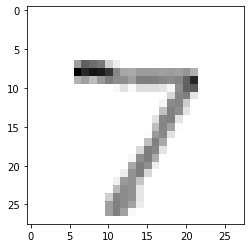

In [19]:
# Print the real data
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()